# WeatherPy

## Giovanni's Analysis
--------------------
The closer you get to the equator the hotter it gets. Seeing 90 degrees Fahrenheit at a 0 latitude.

It is also clearly noticed that humidity increases the closer you are to the equator.

Not seeing a clear correlation between cloudiness and lattitude

Also not seeing a clear correlation between wind speed and latitude.

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#use time function for scatter plots
now = time.localtime(time.time())

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#replace space in cities with +
cities = [city.replace(" ", "+") for city in cities]
len(cities)

631

In [24]:
#Testing time.sleep function. Using it to limit API calls per minute
#for x in range(11):
#    print(x)
#    time.sleep(1.1)
    
#print("Done looping")

In [25]:
#Testing different URLs
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
units = "imperial"

#query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + units
query_url = f'{url}appid={api_key}&q={city}&units={units}'
city_weather = requests.get(query_url).json()
city_weather

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 41.94,
  'pressure': 988,
  'humidity': 81,
  'temp_min': 39.99,
  'temp_max': 45},
 'visibility': 10000,
 'wind': {'speed': 16.11, 'deg': 250},
 'rain': {'1h': 0.25},
 'clouds': {'all': 75},
 'dt': 1551933989,
 'sys': {'type': 1,
  'id': 1414,
  'message': 0.0062,
  'country': 'GB',
  'sunrise': 1551940376,
  'sunset': 1551981063},
 'id': 2643743,
 'name': 'London',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
#Assign base URL to variable
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#variables to be used for DataFrame
citi = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed  = []

print("Begin Data Retrieval")
print("--------------------------")
count = 1
set = 1
for city in cities:
    try:
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        city_weather = requests.get(query_url).json()
        print(f"Processing record {count} of set {set} | {city_weather['name']}")
        
        citi.append(city_weather['name'])
        cloudiness.append(city_weather['clouds']['all'])
        country.append(city_weather['sys']['country'])
        date.append(city_weather['dt'])
        humidity.append(city_weather['main']['humidity'])
        lat.append(city_weather['coord']['lat'])
        lng.append(city_weather['coord']['lon'])
        max_temp.append(city_weather['main']['temp_max'])
        wind_speed.append(city_weather['wind']['speed'])
        
        count += 1
        
        if count > 60:
              count = 1
              set += 1
              
        #No more than 60 API calls per minute      
        time.sleep(1.05)
              
    except KeyError:
        print("City not found. Skipping...")
        time.sleep(1.05)

print("--------------------------")              
print("Data Retrieval Complete")
print("--------------------------")

Begin Data Retrieval
--------------------------
Processing record 1 of set 1 | Pacifica
Processing record 2 of set 1 | Komsomolskiy
Processing record 3 of set 1 | Busselton
Processing record 4 of set 1 | Davila
Processing record 5 of set 1 | Kodiak
Processing record 6 of set 1 | Chokurdakh
Processing record 7 of set 1 | Vallenar
Processing record 8 of set 1 | Saint-Pierre
Processing record 9 of set 1 | Mataura
Processing record 10 of set 1 | Avarua
Processing record 11 of set 1 | San Cristobal
Processing record 12 of set 1 | Stryn
Processing record 13 of set 1 | Singaraja
Processing record 14 of set 1 | Oudtshoorn
Processing record 15 of set 1 | Rikitea
Processing record 16 of set 1 | Caravelas
Processing record 17 of set 1 | Mar del Plata
Processing record 18 of set 1 | Tessalit
Processing record 19 of set 1 | Bredasdorp
Processing record 20 of set 1 | Khatanga
Processing record 21 of set 1 | Broome
Processing record 22 of set 1 | Jamestown
Processing record 23 of set 1 | Esperance
Ci

Processing record 4 of set 4 | Butaritari
Processing record 5 of set 4 | Shumskiy
Processing record 6 of set 4 | Vila Velha
Processing record 7 of set 4 | Lavrentiya
Processing record 8 of set 4 | Thompson
City not found. Skipping...
Processing record 9 of set 4 | Auki
Processing record 10 of set 4 | Altayskoye
Processing record 11 of set 4 | Mount Gambier
Processing record 12 of set 4 | Kavieng
Processing record 13 of set 4 | Upata
Processing record 14 of set 4 | Luderitz
Processing record 15 of set 4 | Longyearbyen
City not found. Skipping...
Processing record 16 of set 4 | Ialibu
Processing record 17 of set 4 | Coahuayana
Processing record 18 of set 4 | Mamallapuram
Processing record 19 of set 4 | Salalah
Processing record 20 of set 4 | Sao Joao da Barra
City not found. Skipping...
Processing record 21 of set 4 | Tateyama
City not found. Skipping...
Processing record 22 of set 4 | Urubicha
Processing record 23 of set 4 | Hasaki
Processing record 24 of set 4 | Cururupu
Processing rec

Processing record 8 of set 7 | Sinnamary
City not found. Skipping...
City not found. Skipping...
Processing record 9 of set 7 | Kisangani
Processing record 10 of set 7 | San Patricio
City not found. Skipping...
Processing record 11 of set 7 | Areka
Processing record 12 of set 7 | Eydhafushi
Processing record 13 of set 7 | Vila Franca do Campo
Processing record 14 of set 7 | Korhogo
Processing record 15 of set 7 | Tongzi
Processing record 16 of set 7 | Borisoglebskiy
Processing record 17 of set 7 | Sarahan
City not found. Skipping...
Processing record 18 of set 7 | Portland
Processing record 19 of set 7 | Korablino
Processing record 20 of set 7 | Nowy Sacz
Processing record 21 of set 7 | Leon
City not found. Skipping...
Processing record 22 of set 7 | Walvis Bay
Processing record 23 of set 7 | Kemin
Processing record 24 of set 7 | Marawi
Processing record 25 of set 7 | Prince Rupert
Processing record 26 of set 7 | Cap Malheureux
City not found. Skipping...
Processing record 27 of set 7 

Processing record 10 of set 10 | Lokosovo
Processing record 11 of set 10 | Acajutla
Processing record 12 of set 10 | Boundiali
Processing record 13 of set 10 | Nuuk
Processing record 14 of set 10 | Ngorongoro
Processing record 15 of set 10 | Tarko-Sale
Processing record 16 of set 10 | Derzhavinsk
Processing record 17 of set 10 | Mbandaka
Processing record 18 of set 10 | Scottsbluff
Processing record 19 of set 10 | Namikupa
--------------------------
Data Retrieval Complete
--------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
dict = {"City": citi, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity, 
       "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Wind Speed": wind_speed}
df = pd.DataFrame(dict)
df.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

In [28]:
#df.to_csv(r'output_data/cities.csv', index = None, header = True)
df.to_csv(output_data_file, header = True)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Pacifica,75,US,1551934311,93,37.61,-122.49,54.00,11.41
1,Komsomolskiy,80,RU,1551934220,76,67.55,63.78,4.06,7.63
2,Busselton,100,AU,1551934216,62,-33.64,115.35,72.00,2.93
3,Davila,20,PH,1551931200,55,18.47,120.58,86.00,6.93
4,Kodiak,75,US,1551934173,71,39.95,-94.76,32.00,5.82


In [29]:
#checking to see if we have a good random list of cities in different countries spanning the world
df_country = df.groupby('Country')
df_country = df_country.count().sort_values("City", ascending=False)
#df_country = df_country["City"]
df_country

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
Country,,,,,,,,
RU,66,66,66,66,66,66,66,66
US,46,46,46,46,46,46,46,46
BR,32,32,32,32,32,32,32,32
CA,27,27,27,27,27,27,27,27
CN,22,22,22,22,22,22,22,22
AU,19,19,19,19,19,19,19,19
MX,16,16,16,16,16,16,16,16
IN,13,13,13,13,13,13,13,13
ID,12,12,12,12,12,12,12,12


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

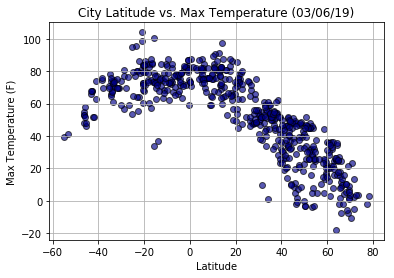

In [30]:
plt.scatter(df['Lat'], df['Max Temp'], marker="o", facecolors="darkblue", edgecolors="black", alpha=0.65)
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%m/%d/%y', now)})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("output_data/max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

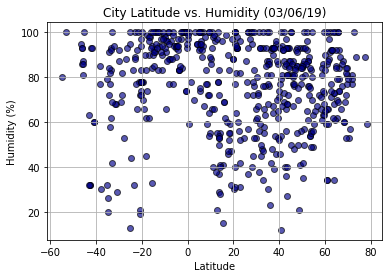

In [31]:
plt.scatter(df['Lat'], df['Humidity'], marker="o", facecolors="darkblue", edgecolors="black", alpha=0.65)
plt.title(f"City Latitude vs. Humidity ({time.strftime('%m/%d/%y', now)})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("output_data/humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

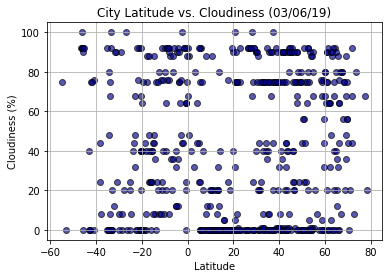

In [32]:
plt.scatter(df['Lat'], df['Cloudiness'], marker="o", facecolors="darkblue", edgecolors="black", alpha=0.65)
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%m/%d/%y', now)})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("output_data/cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

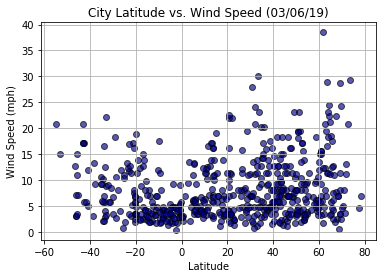

In [33]:
plt.scatter(df['Lat'], df['Wind Speed'], marker="o", facecolors="darkblue", edgecolors="black", alpha=0.65)
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%m/%d/%y', now)})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("output_data/windspeed.png")
plt.show()